In [138]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [139]:
current_directory = os.getcwd()
titanic_dataset = pd.read_csv(f'{current_directory}\\Titanic-Dataset.csv')

titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
titanic_dataset['Age'].fillna(titanic_dataset['Age'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10772\2334375040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset['Age'].fillna(titanic_dataset['Age'].median(), inplace=True)


In [142]:
titanic_dataset.drop(columns=['Cabin'], inplace=True)
titanic_dataset['familySize'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1

In [143]:
# titanic_dataset = pd.get_dummies(titanic_dataset, columns=['Pclass', 'Sex', 'Embarked'])

In [144]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [145]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  familySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [146]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,familySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [147]:
age_per_pclass = titanic_dataset.groupby('Pclass')['Age'].agg(['count','mean', 'median', 'std']).reset_index()
survived_stats = titanic_dataset.groupby('Survived')['Age'].agg(['count','mean', 'median', 'std']).reset_index()

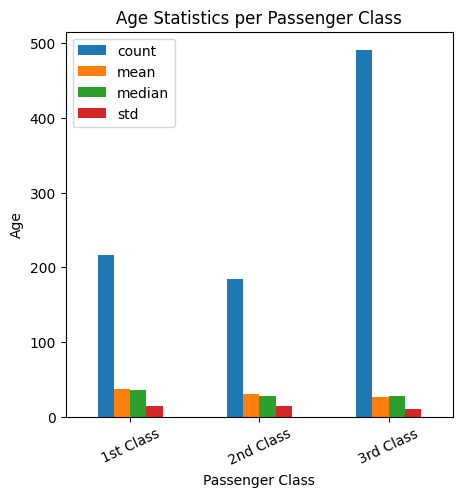

In [148]:
ax = age_per_pclass[['count','mean', 'median', 'std']].plot(kind='bar', figsize=(5, 5), rot=0)
ax.set_xticks(range(len(age_per_pclass)))
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=25)
plt.title('Age Statistics per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [149]:
survived_stats

,Survived,count,mean,median,std
0,0,549,30.028233,28.0,12.499986
1,1,342,28.291433,28.0,13.764425


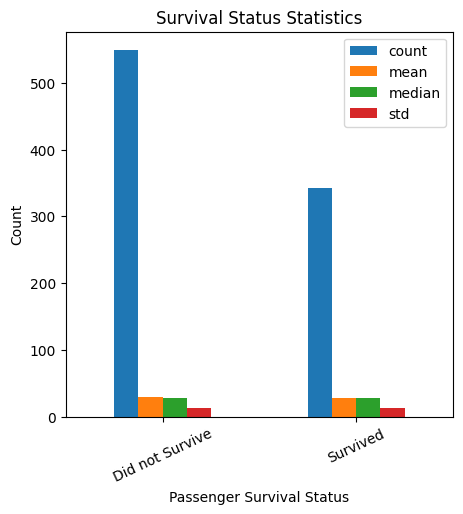

In [150]:
ax = survived_stats[['count','mean', 'median', 'std']].plot(kind='bar', figsize=(5, 5), rot=0)
ax.set_xticks(range(len(survived_stats)))
ax.set_xticklabels(['Did not Survive', 'Survived'], rotation=25)
plt.title('Survival Status Statistics')
plt.xlabel('Passenger Survival Status')
plt.ylabel('Count')
plt.show()

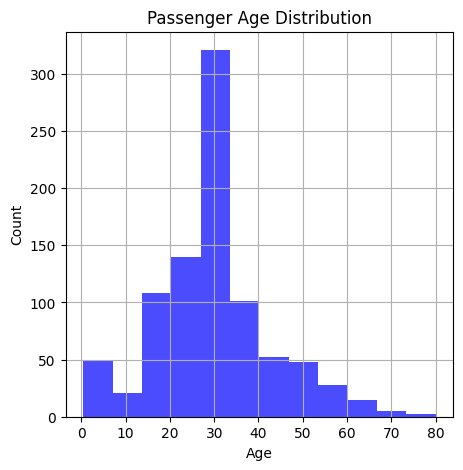

In [151]:
titanic_dataset['Age'].hist(bins=12, figsize=(5, 5), color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passenger Age Distribution')
plt.show()

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split


In [153]:
titanic_dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,2


In [154]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=['Pclass', 'Sex', 'Embarked'])

In [155]:
titanic_dataset.head(1)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,familySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,2,False,False,True,False,True,False,False,True


In [ ]:
X = titanic_dataset.drop(columns=['Survived','Name', 'Ticket', 'PassengerId'])
y = titanic_dataset['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:

from scipy.stats import randint
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1,20),
    }

rf = RandomForestClassifier(random_state=42)

rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....00233F7C2FA70>, 'n_estimators': <scipy.stats....00233F7C2FE30>}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
best_rf = rand_search.best_estimator_

print("Best Parameters for Random Forest Algorithm:", rand_search.best_params_)

Best Parameters: {'max_depth': 9, 'n_estimators': 50}


In [ ]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)    
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nRandom Forest Results:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.82
Precision: 0.77
Recall: 0.76
F1 Score: 0.77


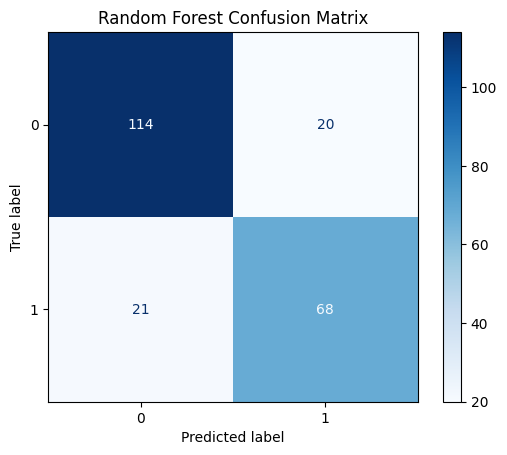

In [160]:
# RandomForest confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [161]:
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)    
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  

print(f'\nDecision Tree Results:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:{confusion}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


# for i in range(5):
#     random_passenger = X_test.sample(1)
#     random_passenger_prediction = clf.predict(random_passenger)
#     print(f'{i}The random passenger survived' if random_passenger_prediction[0] == 1 else 'Did not survive')

Accuracy: 0.81
Confusion Matrix:[[118  16]
 [ 27  62]]


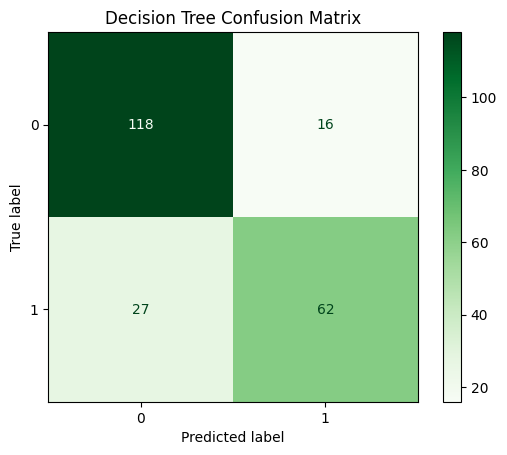

In [163]:
# DecisionTree confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [164]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)    
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



Logistic Regression Results:
Accuracy: 0.80
Confusion Matrix: [[115  19]
 [ 26  63]]
Precision: 0.77
Recall: 0.71
F1 Score: 0.74


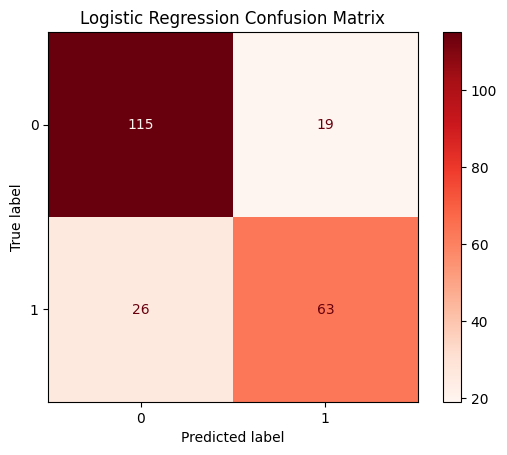

In [166]:
print(f'\nLogistic Regression Results:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix: {confusion}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap="Reds")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
